In [86]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.figure_factory as ff
import plotly.express as px

#from bubbly.bubbly import bubbleplot

import plotly.tools as tls
#import squarify
#from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm
#import dabl

# for providing path
import os
sns.set(style='ticks')

In [87]:
#read the data
path = r'C:\Users\Sydney\.spyder-py3\suicide.csv'
data = pd.read_csv(path)

In [90]:
# having 'years' in the age group seems unnecessary, and '05-14' will sort better than '5-14'
data.loc[:, 'age'] = data['age'].str.replace(' years','')
data.loc[data['age'] == '5-14', 'age'] = '05-14'

In [91]:
data.rename(columns={"sex": "gender", "age": "age group", "suicides_no": "number of suicides"}, inplace = True)

In [65]:
data.columns

Index(['country', 'year', 'gender', 'age group', 'number of suicides',
       'population'],
      dtype='object')

In [97]:
data.head(10)

,country,year,gender,age group,number of suicides,population
24,Albania,1987,female,15-24,14.0,289700.0
25,Albania,1987,female,25-34,4.0,257200.0
26,Albania,1987,female,35-54,6.0,278800.0
27,Albania,1987,female,05-14,0.0,311000.0
28,Albania,1987,female,55-74,0.0,144600.0
29,Albania,1987,female,75+,1.0,35600.0
30,Albania,1987,male,15-24,21.0,312900.0
31,Albania,1987,male,25-34,9.0,274300.0
32,Albania,1987,male,35-54,16.0,308000.0
33,Albania,1987,male,05-14,0.0,338200.0


In [92]:
data.describe()

,year,number of suicides,population
count,35844.000000,35844.000000,3.584400e+04
mean,1998.832608,222.693589,1.705956e+06
std,10.107504,857.863638,3.706646e+06
min,1979.000000,0.000000,2.590000e+02
25%,1991.000000,2.000000,8.056600e+04
50%,2000.000000,21.000000,3.763000e+05
75%,2007.000000,116.000000,1.349025e+06
max,2015.000000,22338.000000,4.380521e+07


In [93]:
from IPython.display import display, HTML
display(data.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,35844,117,Malta,444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,35844,NaN,NaN,NaN,1998.83,10.1075,1979,1991,2000,2007,2015
gender,35844,2,female,17922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age group,35844,6,05-14,5974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number of suicides,35844,NaN,NaN,NaN,222.694,857.864,0,2,21,116,22338
population,35844,NaN,NaN,NaN,1.70596e+06,3.70665e+06,259,80566,376300,1.34902e+06,4.38052e+07


In [68]:
# How many countries do we have suicide statistics available for?

print("Number of Countries available for analysis :", data['country'].nunique())

Number of Countries available for analysis : 141


In [88]:
data = data[data.year != 2016]

In [89]:
data.dropna(inplace = True)

In [74]:
from IPython.display import display, HTML
display(data.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,35844,117,Malta,444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,35844,NaN,NaN,NaN,1998.83,10.1075,1979,1991,2000,2007,2015
gender,35844,2,female,17922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age group,35844,6,05-14,5974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number of suicides,35844,NaN,NaN,NaN,222.694,857.864,0,2,21,116,22338
population,35844,NaN,NaN,NaN,1.70596e+06,3.70665e+06,259,80566,376300,1.34902e+06,4.38052e+07


In [69]:
missing_data_percentage = data.isnull().sum()/data.shape[0]
print(missing_data_percentage*100)

country                0.000000
year                   0.000000
gender                 0.000000
age group              0.000000
number of suicides     5.153509
population            12.472588
dtype: float64


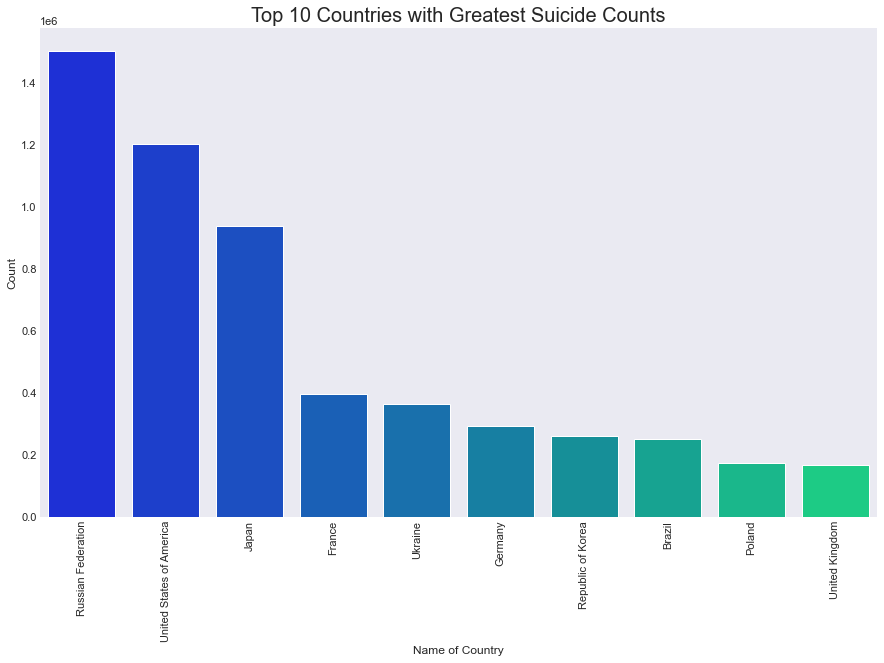

In [94]:
# visualising the different countries distribution in the dataset

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (15, 9)

color = plt.cm.winter(np.linspace(0, 10, 100))
x = pd.DataFrame(data.groupby(['country'])['number of suicides'].sum().reset_index())
x.sort_values(by = ['number of suicides'], ascending = False, inplace = True)

sns.barplot(x['country'].head(10), y = x['number of suicides'].head(10), data = x, palette = 'winter')
plt.title('Top 10 Countries with Greatest Suicide Counts', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

In [95]:
dataByCountryYear = data.groupby(['country', 'year']).sum().reset_index()
dataByCountryYear.set_index('country', inplace = True)
# crude rate calculation
dataByCountryYear['crude_rate_per_100k'] = dataByCountryYear['number of suicides'] / (dataByCountryYear['population'] / 100000)
suicidePercent = dataByCountryYear['crude_rate_per_100k']
percChop = pd.qcut(suicidePercent, 4, labels = ['firstQuart','secondQuart', 'thirdQuart', 'fourthQuart'])
dataByCountryYear['quartile'] = percChop
filt2015 = (dataByCountryYear['year'] == 2015)
dataByCountry2015 = dataByCountryYear[filt2015]

In [76]:
country_list = ['Turkey','Armenia','Brazil','Italy','Austria',
                'Switzerland', 'Russian Federation', 'Belgium']

dfGini = dataByCountry2015[dataByCountry2015.index.isin(country_list)]

In [77]:
dfGini['gini index'] = [32.4, 30.5, 27.7, 51.9, 35.4, 37.7, 32.3, 42.9]

In [78]:
dfGini.head(10)

,year,number of suicides,population,crude_rate_per_100k,quartile,gini index
country,,,,,,
Armenia,2015,74.0,2795335.0,2.647268,firstQuart,32.4
Austria,2015,1251.0,8219386.0,15.220115,thirdQuart,30.5
Belgium,2015,1867.0,10624356.0,17.572830,fourthQuart,27.7
Brazil,2015,11163.0,191087085.0,5.841839,secondQuart,51.9
Italy,2015,3988.0,58117697.0,6.861937,secondQuart,35.4
Russian Federation,2015,25432.0,137018943.0,18.560937,fourthQuart,37.7
Switzerland,2015,1073.0,7892502.0,13.595182,thirdQuart,32.3
Turkey,2015,1532.0,71880464.0,2.131316,firstQuart,42.9


In [139]:
dfGini.drop(columns = ['year', 'number of suicides', 'population'], inplace = True)

In [140]:
dfGini.corr(method = 'pearson')

,crude_rate_per_100k,gini index
crude_rate_per_100k,1.000000,-0.500156
gini index,-0.500156,1.000000


In [144]:
gdpData = pd.read_csv(r'C:\Users\Sydney\.spyder-py3\GDP_data.csv')
dataByCountry2015['Match'] = False
dataByCountry2015.loc[dataByCountry2015.index.isin(gdpData['country']), 'Match'] = True
gdp2015= pd.merge(left=dataByCountry2015, right=gdpData, left_on='country', right_on='country')
gdp2015.drop(columns = ['year', 'number of suicides', 'population', 'Match'], inplace = True)
gdp2015.corr('pearson')

,crude_rate_per_100k,GDP
crude_rate_per_100k,1.000000,0.118502
GDP,0.118502,1.000000


<ipython-input-96-cf4b2e50aef5>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



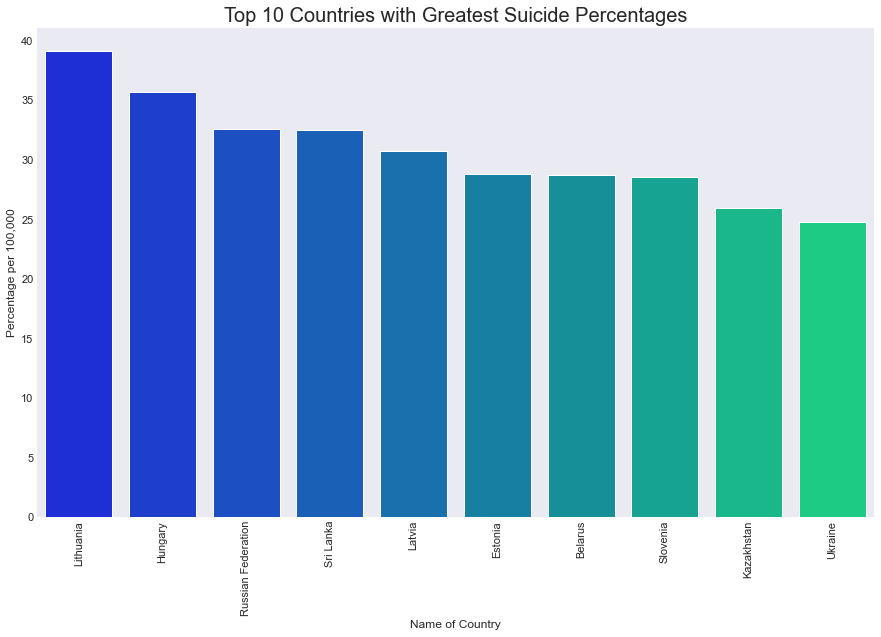

In [96]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (15, 9)
color = plt.cm.winter(np.linspace(0, 10, 100))
xPop = data.groupby(['country'])['number of suicides', 'population'].sum().reset_index()
xPop['crude_rate_per_100k'] = xPop['number of suicides'] / (xPop['population'] / 100000)
xPop.sort_values(by = ['crude_rate_per_100k'], ascending = False, inplace = True)
sns.barplot(xPop['country'].head(10), y = xPop['crude_rate_per_100k'].head(10), data = xPop, palette = 'winter')
plt.title('Top 10 Countries with Greatest Suicide Percentages', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Percentage per 100,000')
plt.show()

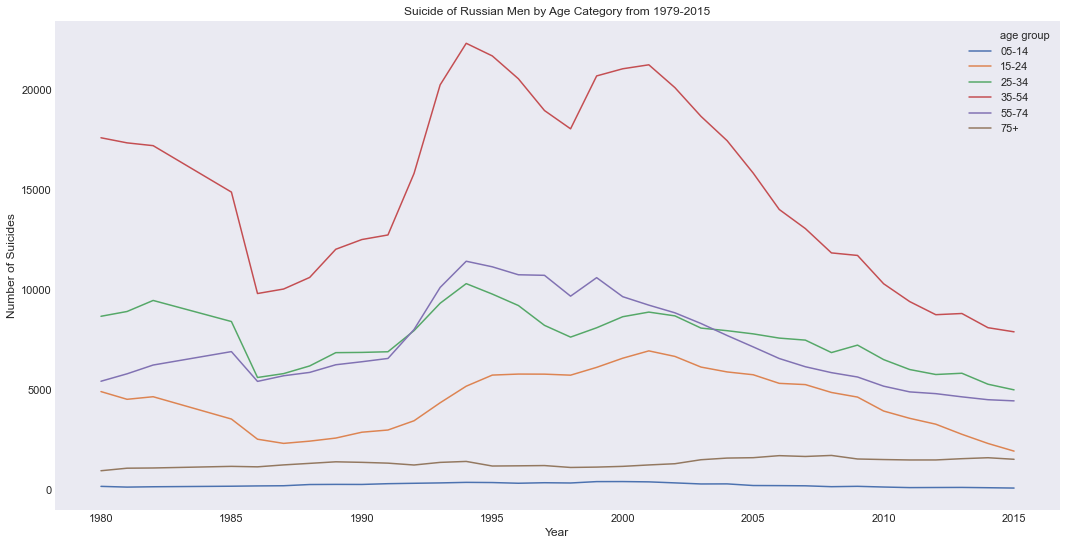

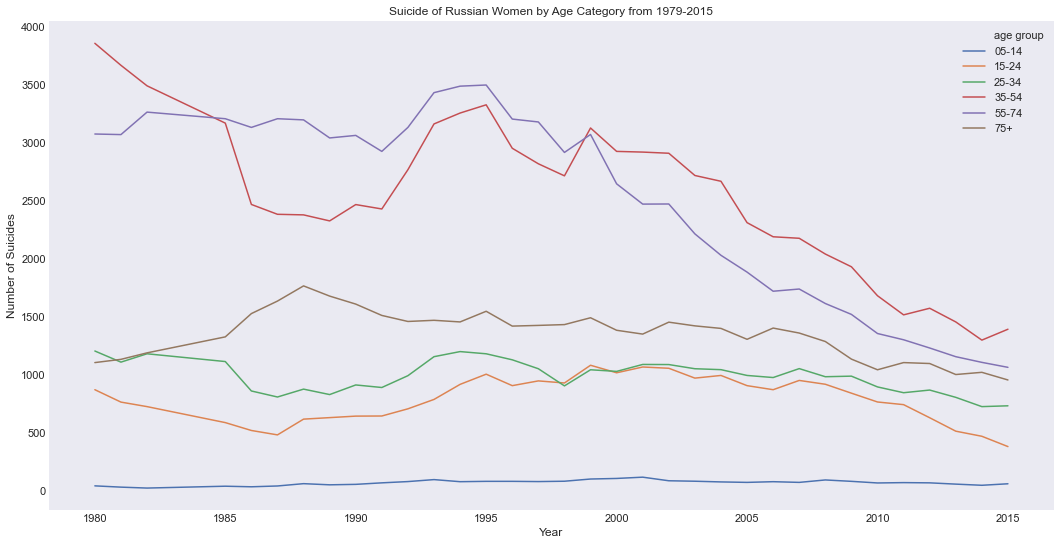

In [101]:
russkyFilt = (data['country'] == 'Russian Federation')
russiaData = data[russkyFilt]


russiaSuicideGender = russiaData.groupby(['year', 'gender']).sum()
russiaSuicideGender = russiaSuicideGender.reset_index()
# figRussia = sns.lineplot(x = 'year', y = 'suicides_no', hue = 'sex', data = russiaSuicideGender)

russiaSuicideAgeGender = russiaData.groupby(['year', 'gender', 'age group']).sum().reset_index()

#working on graph of different ages of men represented by lines across time
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)
russiaMenFilt = (russiaSuicideAgeGender['gender'] == 'male')
russiaMenAge = russiaSuicideAgeGender[russiaMenFilt]
russiaMaleAge = sns.lineplot(x = 'year', y = 'number of suicides', hue = 'age group', data = russiaMenAge)
plt.title('Suicide of Russian Men by Age Category from 1979-2015')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.show()

#working on graph of different ages of women in Russia represented by lines across time '
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)
russiaFemFilt = (russiaSuicideAgeGender['gender'] == 'female')
russiaFemAge = russiaSuicideAgeGender[russiaFemFilt]
russiaFemAgeFig = sns.lineplot(x = 'year', y = 'number of suicides', hue = 'age group', data = russiaFemAge)
plt.title('Suicide of Russian Women by Age Category from 1979-2015')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.show()


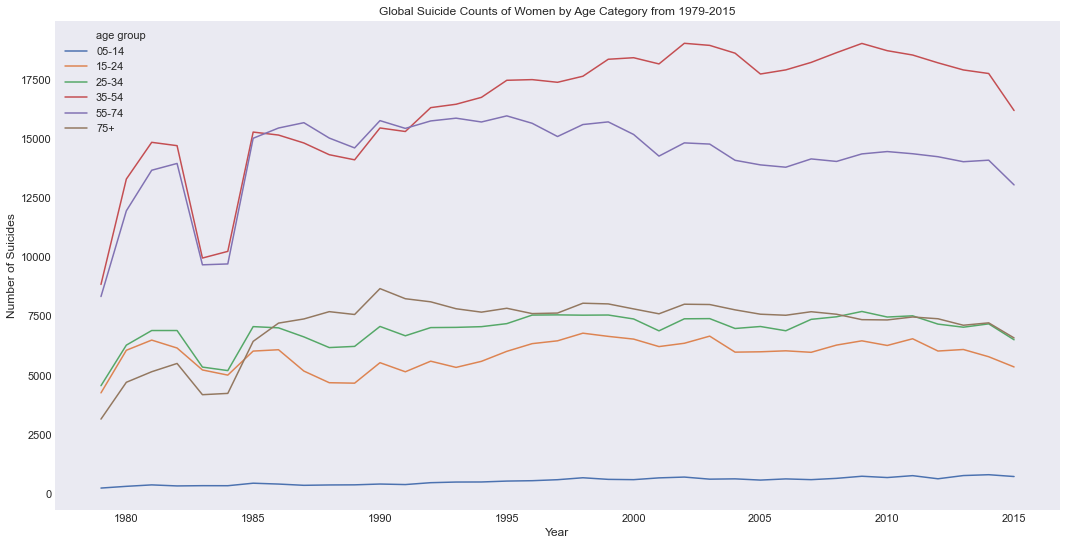

,year,number of suicides,population
count,222.000000,222.000000,2.220000e+02
mean,1997.000000,8516.536036,1.409663e+08
std,10.701207,5513.875979,6.173275e+07
min,1979.000000,246.000000,1.903436e+07
25%,1988.000000,5555.250000,1.041942e+08
50%,1997.000000,7352.000000,1.441646e+08
75%,2006.000000,14136.500000,1.628762e+08
max,2015.000000,19029.000000,3.071926e+08


In [120]:
#all women in the world
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)
#creating the data
suicideAgeGender = data.groupby(['year', 'gender', 'age group']).sum().reset_index()
femData = suicideAgeGender[suicideAgeGender.gender == 'female']
sns.lineplot(x = 'year', y = 'number of suicides', hue = 'age group', data = femData)
plt.title('Global Suicide Counts of Women by Age Category from 1979-2015')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.show()
femData.describe()

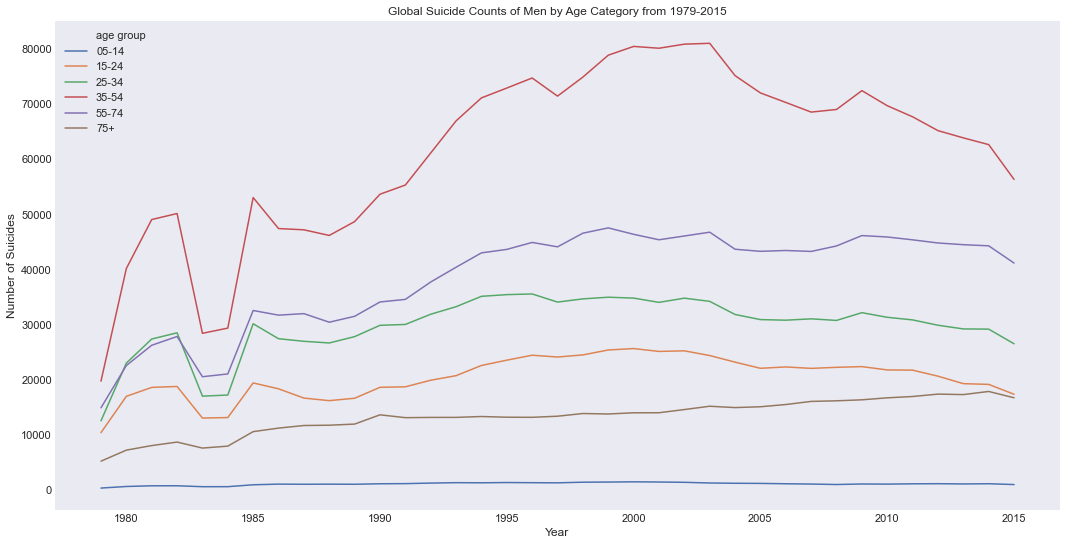

,year,number of suicides,population
count,222.000000,222.000000,2.220000e+02
mean,1997.000000,27439.450450,1.344764e+08
std,10.701207,20839.065587,6.611607e+07
min,1979.000000,389.000000,1.122687e+07
25%,1988.000000,13217.500000,9.878842e+07
50%,1997.000000,23393.500000,1.413803e+08
75%,2006.000000,40354.750000,1.646834e+08
max,2015.000000,81004.000000,3.028464e+08


In [121]:
#all men  in the world
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)
#creating the data
suicideAgeGender = data.groupby(['year', 'gender', 'age group']).sum().reset_index()
manData = suicideAgeGender[suicideAgeGender.gender == 'male']
sns.lineplot(x = 'year', y = 'number of suicides', hue = 'age group', data = manData)
plt.title('Global Suicide Counts of Men by Age Category from 1979-2015')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.show()
manData.describe()

In [122]:
manData.head(10)

,year,gender,age group,number of suicides,population
6,1979,male,05-14,389.0,87966827.0
7,1979,male,15-24,10435.0,82443103.0
8,1979,male,25-34,12580.0,69152433.0
9,1979,male,35-54,19769.0,96739058.0
10,1979,male,55-74,14936.0,56607328.0
11,1979,male,75+,5263.0,11226869.0
18,1980,male,05-14,674.0,113119070.0
19,1980,male,15-24,17013.0,109003231.0
20,1980,male,25-34,23039.0,91862258.0
21,1980,male,35-54,40183.0,129296861.0


In [123]:
manData.groupby(['year', 'gender']).

SyntaxError: invalid syntax (<ipython-input-123-1df4b694a7f1>, line 1)

In [124]:
path = r'C:\Users\Sydney\.spyder-py3\suicide.csv'
data = pd.read_csv(path)

In [131]:
len(data.index)

43776